<a href="https://colab.research.google.com/github/sowmya-rebbavarapu/Big_Mart_Sales_Predection/blob/main/Big_Mart_Sales_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Analysis

In [ ]:
#loading the data set from csv to a pandas data frame
big_mart_data=pd.read_csv('/content/Train.csv')

In [ ]:
#first five rows of the data frame
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#number of data points  & number of features
big_mart_data.shape


(8523, 12)

In [ ]:
#getting information about data set
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


categorical features:


*   Item_Identifier
*   Item_Fat_content


*   Item_Type
*   Outlet_Identifier


*   Outlet_Size
*   Outlet_Location_Type  

*   Outlet_Type













In [ ]:
#checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Handling missing values

mean-->average

mode-->most repeated value

In [23]:
big_mart_data['Item_Weight'] = pd.to_numeric(big_mart_data['Item_Weight'], errors='coerce')
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [ ]:
#filling the missing value of item_weight with the mean
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [25]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Replace the missin values in Outlet_size with mode

In [26]:
mode_of_outlet_size=big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [27]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [28]:
missing_values=big_mart_data['Outlet_Size'].isnull()

In [29]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [31]:
big_mart_data.loc[missing_values,'Outlet_Size']=big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [32]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [33]:
#statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [34]:
sns.set()

<ipython-input-35-68f3f6edec76>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


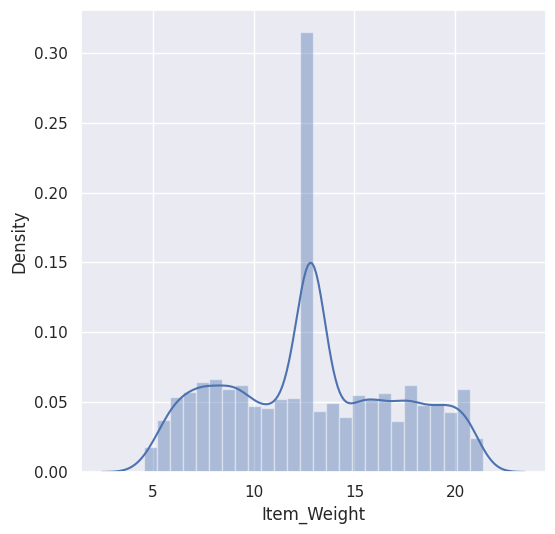

In [35]:
#Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

<ipython-input-36-cda0b3512e23>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


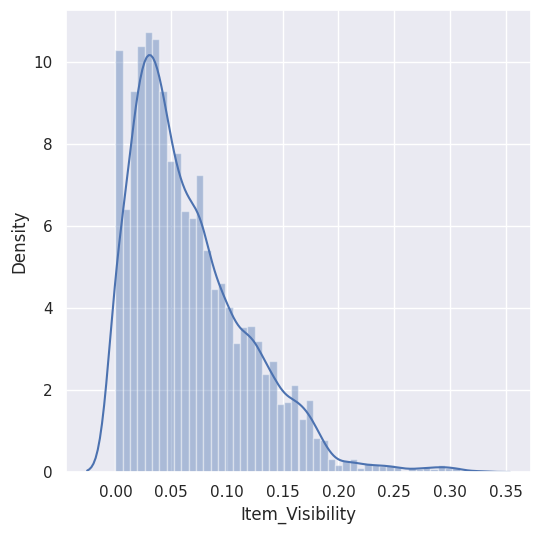

In [36]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

<ipython-input-37-ef57febb85e2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


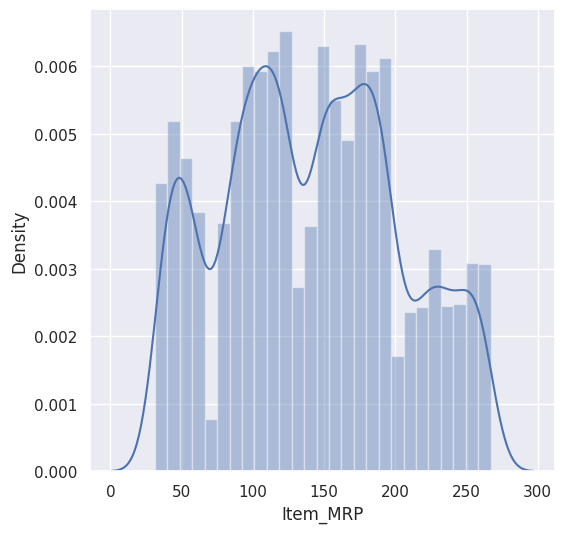

In [37]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-38-9eabe03df3c8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


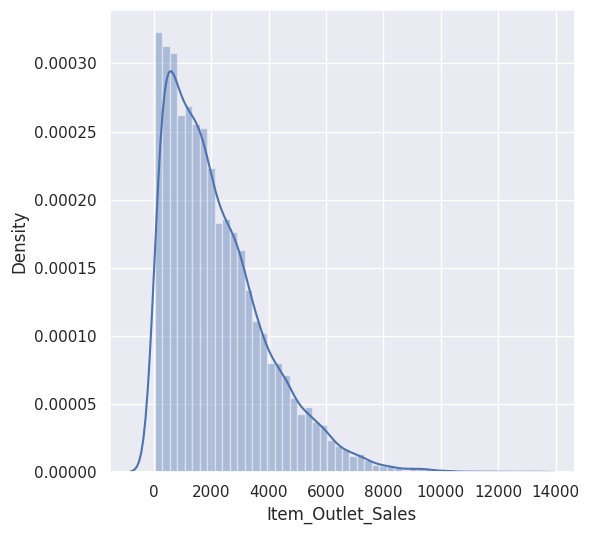

In [38]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

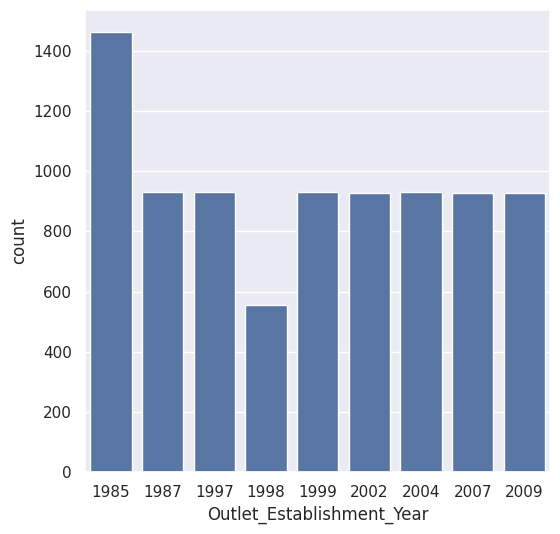

In [40]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

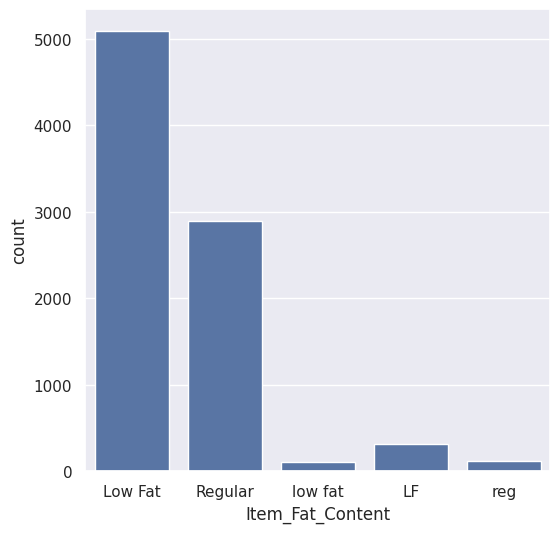

In [41]:
#Item_Fat_Content distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

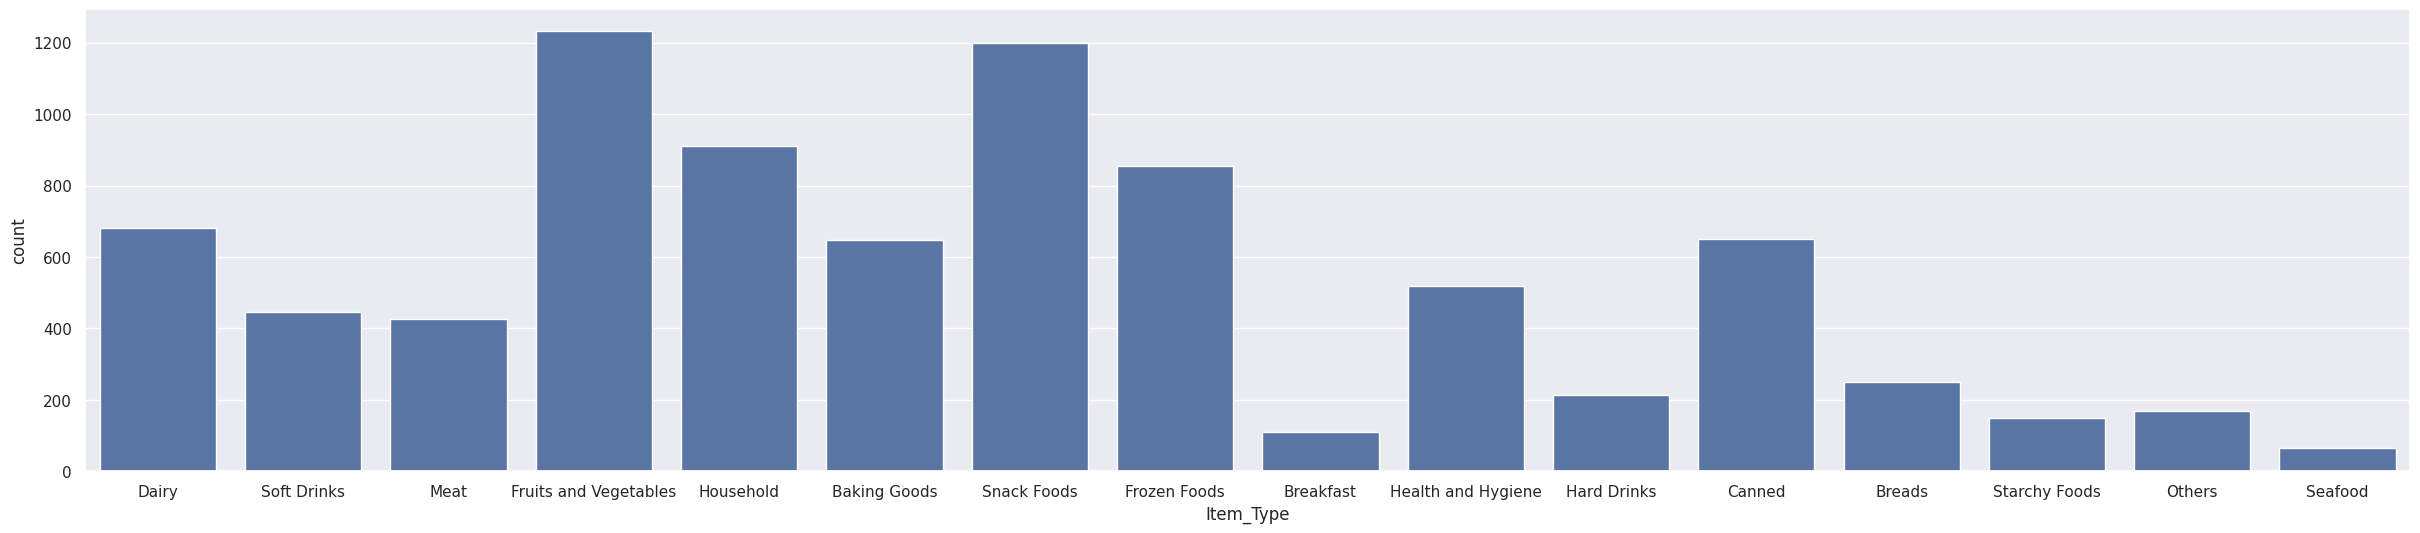

In [44]:
#Item_Type distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

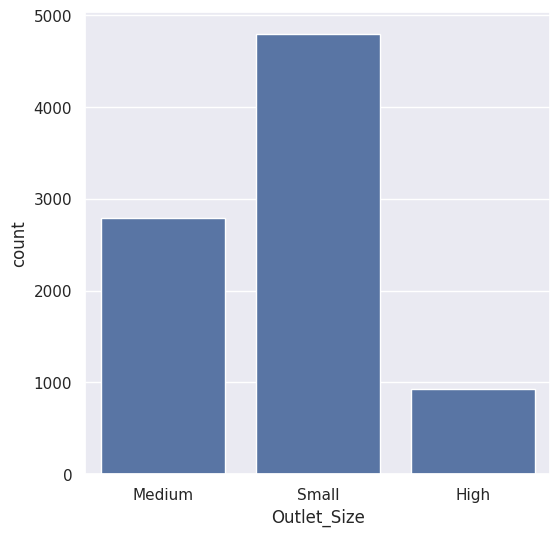

In [45]:
#Outlet_Size distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.show()

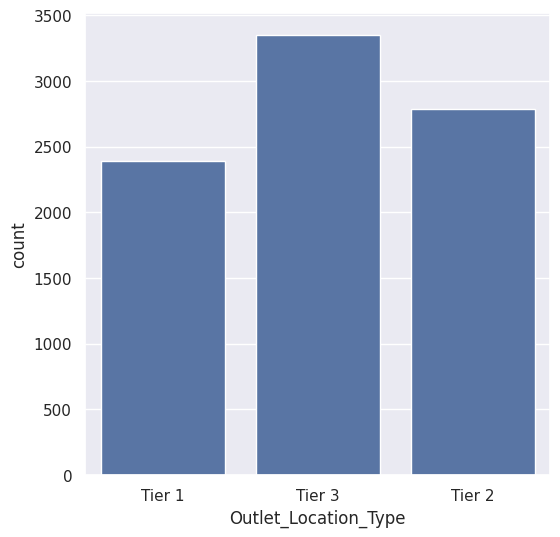

In [47]:
#Outlet_Location_Type distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=big_mart_data)
plt.show()

Data PreProcessing

In [48]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [54]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [55]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding

In [56]:
encoder=LabelEncoder()

In [58]:
big_mart_data['Item_Identifier']=encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Type']=encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier']=encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Location_Type']=encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Item_Fat_Content']=encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Outlet_Size']=encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Type']=encoder.fit_transform(big_mart_data['Outlet_Type'])

In [59]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and target

In [60]:
X=big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y=big_mart_data['Item_Outlet_Sales']

In [61]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [63]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]


Splitting the data into training and testing data

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [66]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Training the machine learning model


In [67]:
regressor=XGBRegressor()

In [68]:
#finds the features between x_train and y_train
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
#predection on training data
training_data_predection=regressor.predict(X_train)

In [70]:
#performace of the model
r2_train=metrics.r2_score(Y_train,training_data_predection)

In [71]:
print('R squared value',r2_train)

R squared value 0.8762174618111388


In [75]:
#predection on testing data
test_data_predection=regressor.predict(X_test)

In [76]:
r2_test=metrics.r2_score(Y_test,test_data_predection)

In [77]:
print("R sqaured value",r2_test)

R sqaured value 0.5017253991620692


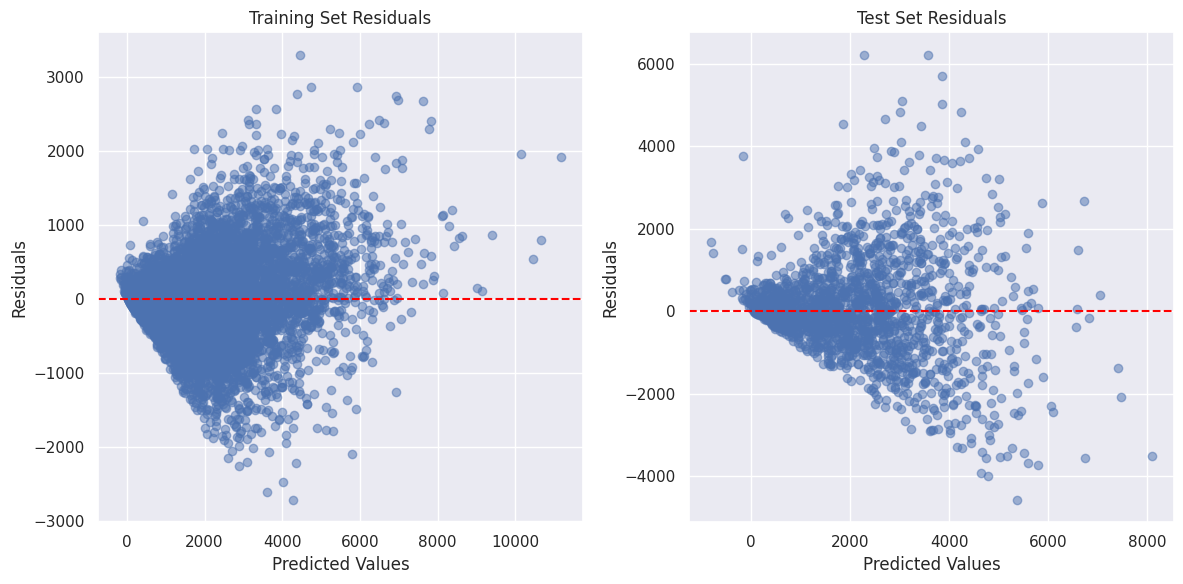

In [78]:
# Calculate residuals
train_residuals = Y_train - training_data_predection
test_residuals = Y_test - test_data_predection

# Plot residuals for training and test sets
plt.figure(figsize=(12, 6))

# Training residuals
plt.subplot(1, 2, 1)
plt.scatter(training_data_predection, train_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training Set Residuals')

# Test residuals
plt.subplot(1, 2, 2)
plt.scatter(test_data_predection, test_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Set Residuals')

plt.tight_layout()
plt.show()

In [79]:
#improve the model performance
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [80]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X_train, Y_train, cv=5)
print("Cross-validated scores:", cv_scores)


Cross-validated scores: [0.54877791 0.50801615 0.51422378 0.52101154 0.48222521]
